# Day 9

## Part 1

- Something tenuous about ropes?? I wasn't really sure
- Simulate the head and tail of the rope
- The tail always travels towards the head of the rope until they are vetically/horizontally/diagonally adjacent
- If not within 1 square but in the same row/col it moves one step per step along that row/col
- If not within 1 square and not in the same row or col it moves diagonally until this is the case.

`How many positions does the tail of the rope visit at least once?`

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from utils import parse_from_file, ParseConfig

parser = ParseConfig('\n', ParseConfig(' ', [str, int]))

moves = parse_from_file('day_9.txt', parser)

print(f'first few moves: {moves[:10]}...')

first few moves: [['D', 2], ['R', 1], ['U', 1], ['L', 1], ['D', 2], ['L', 2], ['R', 1], ['U', 1], ['D', 2], ['U', 1]]...


first few head positions: [(0, 0), (0, -1), (0, -2), (1, -2), (1, -1), (0, -1), (0, -2), (0, -3), (-1, -3), (-2, -3)]...


Text(0.5, 1.0, 'where are we HEADing?')

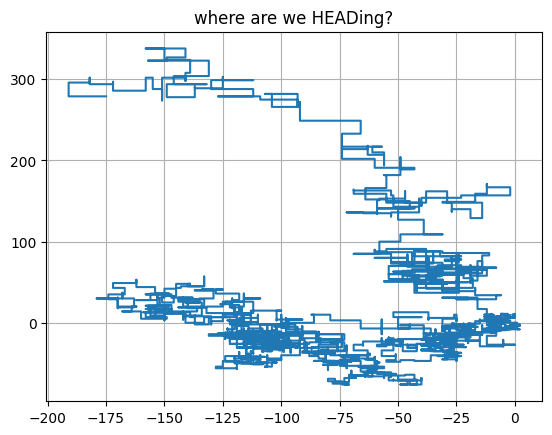

In [58]:
# get coordinates of all the head positions
head_positions = [(0, 0)]
head_x, head_y = head_positions[-1]
for direction, steps in moves:
    # move the head
    if direction == 'D':
        for _ in range(steps):
            head_y -= 1
            head_positions.append((head_x, head_y))
    elif direction == 'R':
        for _ in range(steps):
            head_x += 1
            head_positions.append((head_x, head_y))
    elif direction == 'U':
        for _ in range(steps):
            head_y += 1
            head_positions.append((head_x, head_y))
    elif direction == 'L':
        for _ in range(steps):
            head_x -= 1
            head_positions.append((head_x, head_y))
    else:
        raise ValueError(f'move direction invalid: {direction}')
    

print(f'first few head positions: {head_positions[:10]}...')

head_plot_points = np.transpose(np.array(head_positions))

fig, ax = plt.subplots()
ax.plot(*head_plot_points)
ax.grid('ON')
ax.set_title('where are we HEADing?')

first few tail positions: [(0, 0), (0, -1), (0, -2), (-1, -3), (0, -4), (1, -4), (0, -3), (-1, -3), (0, -4), (1, -3)]...


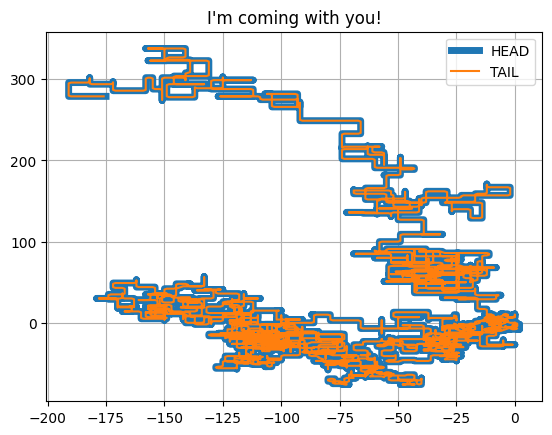

In [61]:
tail_positions = [(0, 0)]

for head_x, head_y in head_positions:    
    tail_x, tail_y = tail_positions[-1]

    # if not in an adjacent square or on top of HEAD
    if abs(head_x - tail_x) > 1 or abs(head_y - tail_y) > 1:
        if tail_x != head_x:
            tail_x += 1 if head_x > tail_x else -1
        if tail_y != head_y:
            tail_y += 1 if head_y > tail_y else -1

        tail_positions.append((tail_x, tail_y))


print(f'first few tail positions: {tail_positions[:10]}...')
tail_point_plots = np.transpose(np.array(tail_positions))

fig, ax = plt.subplots()
ax.plot(*head_plot_points, linewidth=5)
ax.plot(*tail_point_plots)
ax.grid('ON')
ax.set_title('I\'m coming with you!')
ax.legend(['HEAD', 'TAIL'])

In [62]:
tail_has_visited = len(set(tail_positions))

print(f'The rope tail has visited {tail_has_visited} points!')

The rope tail has visited 5878 points!
